# 範例 : 計程車費率預測
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

# [作業目標]
- 試著模仿範例寫法, 使用程車費率預測競賽練習時間欄位處理

# [作業重點]
- 新增星期幾(day of week)與第幾周(week of year)這兩項特徵, 觀察有什麼影響 (In[4], Out[4], In[5], Out[5])
- 新增加上年週期與周周期特徵 , 觀察有什麼影響 (In[8], Out[8], In[9], Out[9]) 

In [1]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import datetime, time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

data_path = 'C:/Users/user/Desktop/ML marathon/data/Feature Engineering/'
df = pd.read_csv(data_path + 'taxi_data1.csv')

train_Y = df['fare_amount']
df = df.drop(['fare_amount'] , axis=1)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [2]:
# 時間特徵分解方式:使用datetime
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [3]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(df_temp)
print(f'shape: {train_X.shape}\n')

start = time.time()
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'time: {time.time() - start} sec\n')

start = time.time()
GDBT = GradientBoostingRegressor()
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')
print(f'time: {time.time() - start} sec')

shape: (5000, 11)

Linear Reg Score : 0.026876871475636888
time: 0.09474849700927734 sec

Gradient Boosting Reg Score : 0.7098023982323651
time: 8.690738916397095 sec


# 作業1
* 對照範例，試著加入星期幾 (day of week) 與第幾周 (week of year) 這兩項特徵，  
看看結果會比原本只有時間特徵分解的結果更好或更差?


In [4]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


#### 加入星期幾與第幾周兩個特徵
> 對照原本只有時間特徵分解的結果，加上'星期幾'與'第幾周'的效果兩種模型都差了一些。分析可能是增加的是數字，讓模型誤判數字間有大小關係（類似標籤編碼）。也許應該嘗試獨熱編碼或者均值編碼，消去變數之間的順序關係。

In [5]:
# 加入星期幾與第幾周兩個特徵
# datetime.date.weekday() : Return the day of the week as an integer, where Monday is 0 and Sunday is 6
# datetime.date.isocalendar() : Return a 3-tuple, (ISO year, ISO week number, ISO weekday).
df['pickup_weekday'] = df['pickup_datetime'].apply(lambda x: datetime.date.isocalendar(x)[2])
df['pickup_weeknumber'] = df['pickup_datetime'].apply(lambda x: datetime.date.isocalendar(x)[1])

In [6]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'shape: {train_X.shape}\n')

# start = time.time()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
# print(f'time: {time.time() - start} sec')

# start = time.time()
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')
# print(f'time: {time.time() - start} sec')

shape: (5000, 13)

Linear Reg Score : 0.026481023863711206
Gradient Boosting Reg Score : 0.7095632474836875


#### 加上"日週期"特徵 (參考講義"週期循環特徵")
> 加上日周期之後，對於線性迴歸模型來說沒有變得比較好，但是對於梯度提升樹有稍微增加。

In [7]:
# 加上"日週期"特徵 (參考講義"週期循環特徵")
import math
df['day_cycle'] = df['pickup_hour']/12 + df['pickup_minute']/720 + df['pickup_second']/43200
df['day_cycle'] = df['day_cycle'].map(lambda x:math.sin(x*math.pi))
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_weeknumber,day_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,5,42,-0.025450
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,2,6,0.333601
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,7,11,-0.967083
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,6,24,-0.888817
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,4,24,0.782427


In [8]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'shape: {train_X.shape}\n')
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

shape: (5000, 14)

Linear Reg Score : 0.02608035229379757
Gradient Boosting Reg Score : 0.7160860706927379


#### 嘗試不加上星期幾與第幾周，只加上日週期
> 線性迴歸模型比前者好，但是梯度提升樹效果變差。

In [9]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime', 'pickup_weekday', 'pickup_weeknumber'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'shape: {train_X.shape}\n')
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

shape: (5000, 12)

Linear Reg Score : 0.026412252675037818
Gradient Boosting Reg Score : 0.7111073032127505


# 作業2
* 對照範例的日週期效果，試著參考投影片完成年週期與周週期的特徵 (也可以用你自己想到的方式)，  
看看結果會比範例中的結果更好或更差?

#### 準備畫圖的東西

In [10]:
import matplotlib.pyplot as plt
import math
plt.style.use("seaborn")

#### 加上"年週期"與"周週期"特徵
> 加上'年週期'與'周週期'特徵，發現模型並沒有比較好。

In [11]:
# 加上"年週期"與"周週期"特徵
# 年週期：以一年當中月份的冷/熱（正/負）當作區分的週期（日以下比重太小忽略）
# 周週期：以一周的疲累程度（正/負）當作區分的週期，假設從星期一開始，一周的疲倦程度是sin函數
df['year_cycle'] = (df['pickup_month'] / 6 + df['pickup_day'] / 180).apply(lambda x: math.cos(x * math.pi))
df['week_cycle'] = (df['pickup_weekday'] / 3.5 + df['pickup_hour'] / 84).apply(lambda x: math.sin(x * math.pi))
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_weeknumber,day_cycle,year_cycle,week_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,5,42,-0.025450,0.777146,-0.804598
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,2,6,0.333601,0.453990,0.826239
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,7,11,-0.967083,-0.275637,0.623490
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,6,24,-0.888817,-0.974370,-0.294755
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,4,24,0.782427,-0.978148,-0.532032


In [12]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'shape: {train_X.shape}\n')
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

shape: (5000, 16)

Linear Reg Score : 0.026001835563951258
Gradient Boosting Reg Score : 0.7096942799222195


#### 通常載客資料越多，收入也會越高
> 觀察各月份、星期幾的載客紀錄

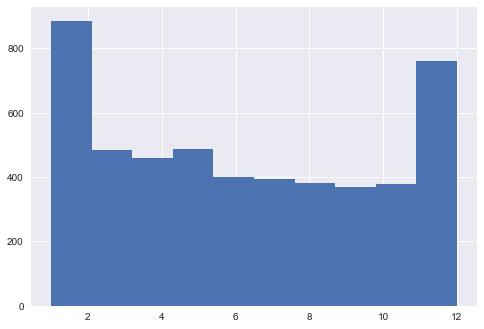

In [13]:
df['pickup_month'].hist() # 發現以載客紀錄資料看起來並沒有年週期

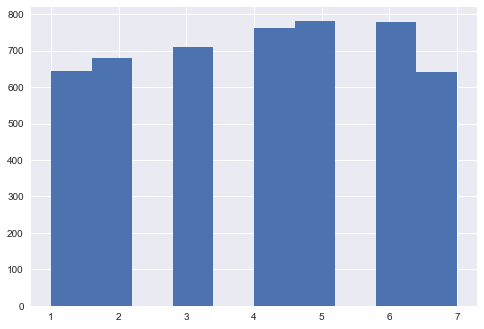

In [14]:
df['pickup_weekday'].hist() # 似乎也沒有明顯的周週期

In [15]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_weeknumber,day_cycle,year_cycle,week_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,5,42,-0.025450,0.777146,-0.804598
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,2,6,0.333601,0.453990,0.826239
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,7,11,-0.967083,-0.275637,0.623490
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,6,24,-0.888817,-0.974370,-0.294755
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,4,24,0.782427,-0.978148,-0.532032


#### 嘗試丟掉一些比較細微、不重要的值，效果有稍為提升

In [16]:
df_temp = df.drop(['pickup_datetime', 'pickup_minute', 'pickup_second'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'shape: {train_X.shape}\n')
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

shape: (5000, 14)

Linear Reg Score : 0.02678959471640128
Gradient Boosting Reg Score : 0.7164129546518767


#### 結論：在處理時間特徵時，可以將日週期、周週期、月週期甚至年週期納入處理的方法中，只是那一種效果較好可能視情況而定。